# Penalize Large Weights With Weight Regularization

Neural networks learn a set of weights that best map inputs to outputs. A network with large network weights can be a sign of an unstable network where small changes in the input can lead to large changes in the output. This can signify that the network has overfitted the training dataset and will likely perform poorly when making predictions on new data. A solution to this problem is to update the learning algorithm to encourage the network to keep the weights small. This is called weight regularization, and it can be used as a general technique to reduce the overfitting of the training dataset and improve the generalization of the model. 

In this tutorial, you will discover weight regularization as an approach to reduce overfitting for neural networks.  After reading this tutorial, you will know:
* Large weights in a neural network signify a more complex network that has overfit the training data.
* Penalizing a network based on the size of the network weights during training can reduce overfitting.
* An L1 or L2 vector norm penalty can be added to the optimization of the network to encourage smaller weights.

## Weight Regularization

In this section, you will discover the problem with neural networks with large weights, a technique that you can use to encourage the development of models with smaller weights called weight regularization, and tips for using this technique in your projects.

### Problem With Large Weights

When fitting a neural network model, we must learn the weights of the network (i.e., the model parameters) using stochastic gradient descent and the training dataset. The longer we train the network, the more specialized the weights will become to the training data, overfitting the training data. The weights will grow in size to handle the specifics of the examples seen in the training data. Large weights make the network unstable. Although the weights will be specialized to the training dataset, minor variation or statistical noise on the expected inputs will result in large differences in the output.

Generally, we refer to this model as having a large variance and a small bias. The model is sensitive to the specific examples, the statistical noise, in the training dataset. A model with large weights is more complex than a model with smaller weights. It is a sign of a network that may be overly specialized to the training data. In practice, we prefer to choose the simpler models to solve a problem (e.g., Occam's razor). We prefer models with smaller weights.

Another possible issue is that there may be many input variables, each with different levels of relevance to the output variable. Sometimes we can use methods to select input variables, but the interrelationships between variables are often not obvious. Having small weights or even zero weights for less relevant or irrelevant inputs to the network will allow the model to focus on learning. This, too, will result in a simpler model.

### Encourage Small Weights

The learning algorithm can be updated to encourage the network to use small weights. One way to do this is to change the calculation of loss used in optimizing the network and consider the weights' size. Remember that when we train a neural network, we minimize a loss function, such as the log loss in classification or mean squared error in regression. In calculating the loss between the predicted and expected values in a batch, we can add the current size of all weights in the network or add a layer to this calculation. This is called a penalty because we are penalizing the model proportional to the size of the weights in the model.

The optimization algorithm will then push the model to have smaller weights, i.e., weights no larger than needed to perform well on the training dataset. Larger weights result in a larger penalty in the form of a larger loss score. Smaller weights are considered more regular or less specialized, and as such, we refer to this penalty as weight regularization. When this approach of penalizing model coefficients is used in other machine learning models such as linear regression or logistic regression, it may be referred to as shrinkage because the penalty encourages the coefficients to shrink during the optimization process.

Adding a weight size penalty or weight regularization to a neural network reduces generalization error and allows the model to pay less attention to less relevant input variables.

### How to Penalize Large Weights

There are two parts to penalizing the model based on the size of the weights. The first is the calculation of the size of the weights, and the second is the amount of attention that the optimization process should pay to the penalty.

**Calculate Weight Size**

Neural network weights are real values that can be positive or negative, as such, simply adding the weights is not sufficient. There are two main approaches used to calculate the size of the weights, they are:

* Calculate the sum of the absolute values of the weights, called the L1 norm (or L<sup>1</sup>).
* Calculate the sum of the squared values of the weights, called the L2 norm (or L<sup>2</sup>).

The use of L2 in linear and logistic regression is often referred to as Ridge Regression. L1 encourages weights to 0.0 if possible, resulting in more sparse weights (with more 0.0 values). L2 offers more nuance, both penalizing larger weights more severely but resulting in less sparse weights. This is useful to know when developing an intuition for the penalty or examples of its usage.

The weights may be considered a vector, and the magnitude of a vector is called its norm from linear algebra. As such, penalizing the model based on the size of the weights is also referred to as a weight or parameter norm penalty. It is possible to include both L1 and L2 approaches to calculating the size of the weights as the penalty. This is akin to using both penalties used in the Elastic Net algorithm for linear and logistic regression. The L2 approach is perhaps the most used and is traditionally referred to as weight decay in neural networks. It is called shrinkage in statistics, a name that encourages you to think of the impact of the penalty on the model weights during the learning process.

Recall that each node has input weights and a bias weight. The bias weight is generally not included in the penalty because the input is constant.

**Control Impact of the Penalty**

The calculated size of the weights is added to the loss objective function when training the network. Rather than adding each weight to the penalty directly, they can be weighted using a new hyperparameter called alpha (\alpha) or sometimes lambda. This controls the amount of attention that the learning process should pay to the penalty. Alternatively, put another way, the amount to penalize the model is based on the size of the weights. The alpha hyperparameter has a value between 0.0 (no penalty) and 1.0 (full penalty). This hyperparameter controls the amount of bias in the model from 0.0, or low bias (high variance), to 1.0, or high bias (low variance).

If the penalty is too strong, the model will underestimate the weights and underfit the problem. If the penalty is too weak, the model will be allowed to overfit the training data. The vector norm of the weights is often calculated per layer rather than across the entire network. This allows more flexibility in choosing the type of regularization used (e.g., L1 for inputs, L2 elsewhere) and flexibility in the alpha value, although it is common to use the same alpha value on each layer by default.

### Tips for Using Weight Regularization

This section provides some tips for using weight regularization with your neural network.

**Use With All Network Types**

Weight regularization is a generic approach. It can be used with most, perhaps all, types of neural network models, not least the most common network types of Multilayer Perceptrons, Convolutional Neural Networks, and Long Short-Term Memory Recurrent Neural Networks. In LSTMs, it may be desirable to use different penalties or penalty configurations for the input and recurrent connections.

**Standardize Input Data**

It is generally good practice to update input variables to have the same scale. When input variables have different scales, the scale of the network's weights will, in turn, vary accordingly. This introduces a problem when using weight regularization because the absolute or squared values of the weights must be added for use in the penalty. This problem can be addressed by either normalizing or standardizing input variables.

**Use a Larger Network**

It is common for larger networks (more layers or more nodes) to overfit the training data more easily. When using weight regularization, it is possible to use larger networks with less risk of overfitting. A good configuration strategy may be to start with larger networks and use weight decay.

**Grid Search Parameters**

It is common to use small values for the regularization hyperparameter that controls the contribution of each weight to the penalty. Perhaps start by testing values on a log scale, such as 0.1, 0.001, and 0.0001. Then use a grid search at the order of magnitude that shows the most promise.

**Use L1 + L2 Together**

Rather than trying to choose between L1 and L2 penalties, use both. Modern and effective linear regression methods such as the Elastic Net use both L1 and L2 penalties at the same time, and this can be a useful approach to try. This gives you both the nuance of L2 and the sparsity encouraged by L1.

**Use on a Trained Network**

The use of weight regularization may allow more elaborate training schemes. For example, a model may be fit on training data first without any regularization, then updated later with the use of a weight penalty to reduce the size of the weights of the already well-performing model.

## Weight Regularization Case Study

In this section, we will demonstrate how to use weight regularization to reduce the overfitting of an MLP on a simple binary classification problem. This example provides a template for applying weight regularization to your neural network for classification and regression problems.

### Binary Classification Problem

We will use a standard binary classification problem that defines two semi-circles of observations: one semi-circle for each class. Each observation has two input variables with the same scale and a class output value of 0 or 1. This dataset is called the `moons` dataset because of the shape of the observations in each class when plotted. We can use the `make_moons()` function to generate observations from this problem. We will add noise to the data and seed the random number generator to generate the same samples each time the code is run.

```
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
```

We can plot the dataset where the two variables are taken as `x` and `y` coordinates on a graph, and the class value is taken as the color of the observation. The complete example of generating the dataset and plotting it is listed below.

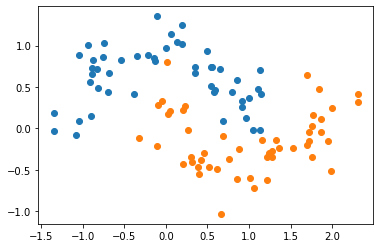

In [1]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show plot
pyplot.show()

Running the example creates a scatter plot showing the semi-circle or moon shape of the observations in each class. We can see the noise in the dispersal of the points, making the moons less obvious.

This is a good test problem because a line cannot separate the classes, e.g., are not linearly separable, requiring a nonlinear method such as a neural network to address. We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have a higher error on the test dataset: a good case for using regularization. Further, the samples have noise, allowing the model to learn aspects of the samples that do not generalize.

### Overfit Multilayer Perceptron Model

We can develop an MLP model to address this binary classification problem. The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits. Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model's performance.

In [2]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define the model. The model uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer to predict class values of 0 or 1. The model is optimized using the binary cross-entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [3]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32. We will use the test set as the validation dataset to get an idea of the model performance on a holdout dataset during training.

In [4]:
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)

Epoch 1/4000
1/1 [==============================] - 1s 845ms/step - loss: 0.6684 - accuracy: 0.8667 - val_loss: 0.6695 - val_accuracy: 0.6571
Epoch 2/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6521 - accuracy: 0.8667 - val_loss: 0.6593 - val_accuracy: 0.6857
Epoch 3/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6363 - accuracy: 0.8333 - val_loss: 0.6494 - val_accuracy: 0.6857
Epoch 4/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.6211 - accuracy: 0.8333 - val_loss: 0.6399 - val_accuracy: 0.6857
Epoch 5/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6062 - accuracy: 0.8333 - val_loss: 0.6308 - val_accuracy: 0.6857
Epoch 6/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5919 - accuracy: 0.8333 - val_loss: 0.6221 - val_accuracy: 0.6857
Epoch 7/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5780 - accuracy: 0.8333 - val_loss: 0.6137 - val_accuracy: 0.6857
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2358 - accuracy: 0.9000 - val_loss: 0.4527 - val_accuracy: 0.7286
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2337 - accuracy: 0.9000 - val_loss: 0.4522 - val_accuracy: 0.7286
Epoch 61/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2316 - accuracy: 0.9000 - val_loss: 0.4516 - val_accuracy: 0.7429
Epoch 62/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2295 - accuracy: 0.9000 - val_loss: 0.4511 - val_accuracy: 0.7429
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2276 - accuracy: 0.9000 - val_loss: 0.4506 - val_accuracy: 0.7429
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2258 - accuracy: 0.9000 - val_loss: 0.4501 - val_accuracy: 0.7429
Epoch 65/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2240 - accuracy: 0.9000 - val_loss: 0.4496 - val_accuracy: 0.7429
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.1522 - accuracy: 0.9667 - val_loss: 0.3787 - val_accuracy: 0.8286
Epoch 174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1519 - accuracy: 0.9667 - val_loss: 0.3783 - val_accuracy: 0.8286
Epoch 175/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1516 - accuracy: 0.9667 - val_loss: 0.3780 - val_accuracy: 0.8286
Epoch 176/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1513 - accuracy: 0.9667 - val_loss: 0.3776 - val_accuracy: 0.8286
Epoch 177/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1510 - accuracy: 0.9667 - val_loss: 0.3772 - val_accuracy: 0.8286
Epoch 178/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1507 - accuracy: 0.9667 - val_loss: 0.3769 - val_accuracy: 0.8286
Epoch 179/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1504 - accuracy: 0.9667 - val_loss: 0.3766 - val_accuracy: 0.8286
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1347 - accuracy: 0.9667 - val_loss: 0.3710 - val_accuracy: 0.8286
Epoch 288/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1346 - accuracy: 0.9667 - val_loss: 0.3710 - val_accuracy: 0.8286
Epoch 289/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1345 - accuracy: 0.9667 - val_loss: 0.3709 - val_accuracy: 0.8286
Epoch 290/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1344 - accuracy: 0.9667 - val_loss: 0.3708 - val_accuracy: 0.8286
Epoch 291/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1343 - accuracy: 0.9667 - val_loss: 0.3708 - val_accuracy: 0.8429
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1343 - accuracy: 0.9667 - val_loss: 0.3707 - val_accuracy: 0.8429
Epoch 293/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.1342 - accuracy: 0.9667 - val_loss: 0.3707 - val_accuracy: 0.8429
Epoch 294/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.1218 - accuracy: 0.9667 - val_loss: 0.3579 - val_accuracy: 0.8429
Epoch 402/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.1217 - accuracy: 0.9667 - val_loss: 0.3576 - val_accuracy: 0.8429
Epoch 403/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1215 - accuracy: 0.9667 - val_loss: 0.3573 - val_accuracy: 0.8429
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1214 - accuracy: 0.9667 - val_loss: 0.3570 - val_accuracy: 0.8429
Epoch 405/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1212 - accuracy: 0.9667 - val_loss: 0.3568 - val_accuracy: 0.8429
Epoch 406/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1211 - accuracy: 0.9667 - val_loss: 0.3566 - val_accuracy: 0.8429
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1209 - accuracy: 0.9667 - val_loss: 0.3563 - val_accuracy: 0.8429
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0978 - accuracy: 0.9667 - val_loss: 0.3127 - val_accuracy: 0.8429
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0975 - accuracy: 0.9667 - val_loss: 0.3122 - val_accuracy: 0.8429
Epoch 517/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0972 - accuracy: 0.9667 - val_loss: 0.3117 - val_accuracy: 0.8429
Epoch 518/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0970 - accuracy: 0.9667 - val_loss: 0.3112 - val_accuracy: 0.8571
Epoch 519/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0967 - accuracy: 0.9667 - val_loss: 0.3107 - val_accuracy: 0.8571
Epoch 520/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0964 - accuracy: 0.9667 - val_loss: 0.3103 - val_accuracy: 0.8571
Epoch 521/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0962 - accuracy: 0.9667 - val_loss: 0.3098 - val_accuracy: 0.8571
Epoch 522/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0654 - accuracy: 0.9667 - val_loss: 0.2584 - val_accuracy: 0.9286
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0651 - accuracy: 0.9667 - val_loss: 0.2580 - val_accuracy: 0.9286
Epoch 631/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0648 - accuracy: 0.9667 - val_loss: 0.2577 - val_accuracy: 0.9286
Epoch 632/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0646 - accuracy: 0.9667 - val_loss: 0.2573 - val_accuracy: 0.9286
Epoch 633/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0643 - accuracy: 0.9667 - val_loss: 0.2569 - val_accuracy: 0.9286
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0640 - accuracy: 0.9667 - val_loss: 0.2564 - val_accuracy: 0.9286
Epoch 635/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0638 - accuracy: 0.9667 - val_loss: 0.2560 - val_accuracy: 0.9286
Epoch 636/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.0394 - accuracy: 1.0000 - val_loss: 0.2342 - val_accuracy: 0.9286
Epoch 744/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0392 - accuracy: 1.0000 - val_loss: 0.2342 - val_accuracy: 0.9286
Epoch 745/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0390 - accuracy: 1.0000 - val_loss: 0.2341 - val_accuracy: 0.9286
Epoch 746/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0389 - accuracy: 1.0000 - val_loss: 0.2340 - val_accuracy: 0.9286
Epoch 747/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 0.2340 - val_accuracy: 0.9286
Epoch 748/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 0.2340 - val_accuracy: 0.9286
Epoch 749/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.2339 - val_accuracy: 0.9286
Epoch 750/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.2373 - val_accuracy: 0.9429
Epoch 858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.2375 - val_accuracy: 0.9429
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.2376 - val_accuracy: 0.9429
Epoch 860/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.2377 - val_accuracy: 0.9429
Epoch 861/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.2378 - val_accuracy: 0.9429
Epoch 862/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.2379 - val_accuracy: 0.9429
Epoch 863/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.2380 - val_accuracy: 0.9429
Epoch 864/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.2533 - val_accuracy: 0.9429
Epoch 972/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2534 - val_accuracy: 0.9429
Epoch 973/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2536 - val_accuracy: 0.9429
Epoch 974/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.2537 - val_accuracy: 0.9429
Epoch 975/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.2539 - val_accuracy: 0.9429
Epoch 976/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.2540 - val_accuracy: 0.9429
Epoch 977/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.2542 - val_accuracy: 0.9429
Epoch 978/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2716 - val_accuracy: 0.9429
Epoch 1086/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2718 - val_accuracy: 0.9429
Epoch 1087/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2719 - val_accuracy: 0.9429
Epoch 1088/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2721 - val_accuracy: 0.9429
Epoch 1089/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2722 - val_accuracy: 0.9429
Epoch 1090/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.2724 - val_accuracy: 0.9429
Epoch 1091/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.2725 - val_accuracy: 0.9429
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2806 - val_accuracy: 0.9429
Epoch 1143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2808 - val_accuracy: 0.9429
Epoch 1144/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2809 - val_accuracy: 0.9429
Epoch 1145/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2811 - val_accuracy: 0.9429
Epoch 1146/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2812 - val_accuracy: 0.9429
Epoch 1147/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.2814 - val_accuracy: 0.9429
Epoch 1148/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.2815 - val_accuracy: 0.9429
Epoch 11

1/1 [==============================] - 0s 23ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2896 - val_accuracy: 0.9286
Epoch 1200/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2897 - val_accuracy: 0.9286
Epoch 1201/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2899 - val_accuracy: 0.9286
Epoch 1202/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2901 - val_accuracy: 0.9286
Epoch 1203/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2902 - val_accuracy: 0.9286
Epoch 1204/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2904 - val_accuracy: 0.9286
Epoch 1205/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2905 - val_accuracy: 0.9286
Epoch 12

1/1 [==============================] - 0s 23ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.2979 - val_accuracy: 0.9286
Epoch 1257/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.2980 - val_accuracy: 0.9286
Epoch 1258/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2982 - val_accuracy: 0.9286
Epoch 1259/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2983 - val_accuracy: 0.9286
Epoch 1260/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2985 - val_accuracy: 0.9286
Epoch 1261/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2986 - val_accuracy: 0.9286
Epoch 1262/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2988 - val_accuracy: 0.9286
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3059 - val_accuracy: 0.9286
Epoch 1314/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3060 - val_accuracy: 0.9286
Epoch 1315/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3061 - val_accuracy: 0.9286
Epoch 1316/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3063 - val_accuracy: 0.9286
Epoch 1317/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3064 - val_accuracy: 0.9286
Epoch 1318/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3066 - val_accuracy: 0.9286
Epoch 1319/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3067 - val_accuracy: 0.9286
Epoch 13

1/1 [==============================] - 0s 23ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3136 - val_accuracy: 0.9286
Epoch 1371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3137 - val_accuracy: 0.9286
Epoch 1372/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3138 - val_accuracy: 0.9286
Epoch 1373/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3139 - val_accuracy: 0.9286
Epoch 1374/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3141 - val_accuracy: 0.9286
Epoch 1375/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3142 - val_accuracy: 0.9286
Epoch 1376/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3143 - val_accuracy: 0.9286
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3207 - val_accuracy: 0.9286
Epoch 1428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3209 - val_accuracy: 0.9286
Epoch 1429/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3210 - val_accuracy: 0.9286
Epoch 1430/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3211 - val_accuracy: 0.9286
Epoch 1431/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3212 - val_accuracy: 0.9286
Epoch 1432/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3214 - val_accuracy: 0.9286
Epoch 1433/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3215 - val_accuracy: 0.9286
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3274 - val_accuracy: 0.9286
Epoch 1485/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3275 - val_accuracy: 0.9286
Epoch 1486/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3276 - val_accuracy: 0.9286
Epoch 1487/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3277 - val_accuracy: 0.9286
Epoch 1488/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3279 - val_accuracy: 0.9286
Epoch 1489/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3280 - val_accuracy: 0.9286
Epoch 1490/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3281 - val_accuracy: 0.9286
Epoch 14

1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3338 - val_accuracy: 0.9286
Epoch 1542/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3339 - val_accuracy: 0.9286
Epoch 1543/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3340 - val_accuracy: 0.9286
Epoch 1544/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3341 - val_accuracy: 0.9286
Epoch 1545/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3343 - val_accuracy: 0.9286
Epoch 1546/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3344 - val_accuracy: 0.9286
Epoch 1547/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3345 - val_accuracy: 0.9286
Epoch 15

1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3401 - val_accuracy: 0.9286
Epoch 1599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3402 - val_accuracy: 0.9286
Epoch 1600/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3404 - val_accuracy: 0.9286
Epoch 1601/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3405 - val_accuracy: 0.9286
Epoch 1602/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3406 - val_accuracy: 0.9286
Epoch 1603/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3407 - val_accuracy: 0.9286
Epoch 1604/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3408 - val_accuracy: 0.9286
Epoch 16

1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3463 - val_accuracy: 0.9286
Epoch 1656/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3464 - val_accuracy: 0.9286
Epoch 1657/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3465 - val_accuracy: 0.9286
Epoch 1658/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3466 - val_accuracy: 0.9286
Epoch 1659/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3467 - val_accuracy: 0.9286
Epoch 1660/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3468 - val_accuracy: 0.9286
Epoch 1661/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3469 - val_accuracy: 0.9286
Epoch 16

1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3521 - val_accuracy: 0.9286
Epoch 1713/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3522 - val_accuracy: 0.9286
Epoch 1714/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3523 - val_accuracy: 0.9286
Epoch 1715/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3524 - val_accuracy: 0.9286
Epoch 1716/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3525 - val_accuracy: 0.9286
Epoch 1717/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3526 - val_accuracy: 0.9286
Epoch 1718/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3527 - val_accuracy: 0.9286
Epoch 17

1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3578 - val_accuracy: 0.9286
Epoch 1770/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3579 - val_accuracy: 0.9286
Epoch 1771/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3580 - val_accuracy: 0.9286
Epoch 1772/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3581 - val_accuracy: 0.9286
Epoch 1773/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3582 - val_accuracy: 0.9286
Epoch 1774/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3583 - val_accuracy: 0.9286
Epoch 1775/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3584 - val_accuracy: 0.9286
Epoch 17

1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3633 - val_accuracy: 0.9286
Epoch 1827/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3634 - val_accuracy: 0.9286
Epoch 1828/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3635 - val_accuracy: 0.9286
Epoch 1829/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3636 - val_accuracy: 0.9286
Epoch 1830/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3637 - val_accuracy: 0.9286
Epoch 1831/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3638 - val_accuracy: 0.9286
Epoch 1832/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3639 - val_accuracy: 0.9286
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3687 - val_accuracy: 0.9286
Epoch 1884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3687 - val_accuracy: 0.9286
Epoch 1885/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3689 - val_accuracy: 0.9286
Epoch 1886/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3690 - val_accuracy: 0.9286
Epoch 1887/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3691 - val_accuracy: 0.9286
Epoch 1888/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3692 - val_accuracy: 0.9286
Epoch 1889/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3693 - val_accuracy: 0.9286
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3739 - val_accuracy: 0.9286
Epoch 1941/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3740 - val_accuracy: 0.9286
Epoch 1942/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3741 - val_accuracy: 0.9286
Epoch 1943/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3742 - val_accuracy: 0.9286
Epoch 1944/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3742 - val_accuracy: 0.9286
Epoch 1945/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3743 - val_accuracy: 0.9286
Epoch 1946/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3744 - val_accuracy: 0.9286
Epoch 19

1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3790 - val_accuracy: 0.9286
Epoch 1998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3791 - val_accuracy: 0.9286
Epoch 1999/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3792 - val_accuracy: 0.9286
Epoch 2000/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3793 - val_accuracy: 0.9286
Epoch 2001/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3793 - val_accuracy: 0.9286
Epoch 2002/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3794 - val_accuracy: 0.9286
Epoch 2003/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3795 - val_accuracy: 0.9286
Epoch 20

1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3839 - val_accuracy: 0.9286
Epoch 2055/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3840 - val_accuracy: 0.9286
Epoch 2056/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3841 - val_accuracy: 0.9286
Epoch 2057/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3842 - val_accuracy: 0.9286
Epoch 2058/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3843 - val_accuracy: 0.9286
Epoch 2059/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3843 - val_accuracy: 0.9286
Epoch 2060/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3844 - val_accuracy: 0.9286
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3887 - val_accuracy: 0.9286
Epoch 2112/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3888 - val_accuracy: 0.9286
Epoch 2113/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3889 - val_accuracy: 0.9286
Epoch 2114/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3890 - val_accuracy: 0.9286
Epoch 2115/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3890 - val_accuracy: 0.9286
Epoch 2116/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3891 - val_accuracy: 0.9286
Epoch 2117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3892 - val_accuracy: 0.9286
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3934 - val_accuracy: 0.9286
Epoch 2169/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3935 - val_accuracy: 0.9286
Epoch 2170/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3936 - val_accuracy: 0.9286
Epoch 2171/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3936 - val_accuracy: 0.9286
Epoch 2172/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3937 - val_accuracy: 0.9286
Epoch 2173/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3938 - val_accuracy: 0.9286
Epoch 2174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3939 - val_accuracy: 0.9286
Epoch 21

1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3979 - val_accuracy: 0.9286
Epoch 2226/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3980 - val_accuracy: 0.9286
Epoch 2227/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3981 - val_accuracy: 0.9286
Epoch 2228/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3982 - val_accuracy: 0.9286
Epoch 2229/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3983 - val_accuracy: 0.9286
Epoch 2230/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3984 - val_accuracy: 0.9286
Epoch 2231/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3984 - val_accuracy: 0.9286
Epoch 22

Epoch 2281/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.4787e-04 - accuracy: 1.0000 - val_loss: 0.4023 - val_accuracy: 0.9286
Epoch 2282/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.4667e-04 - accuracy: 1.0000 - val_loss: 0.4024 - val_accuracy: 0.9286
Epoch 2283/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.4553e-04 - accuracy: 1.0000 - val_loss: 0.4025 - val_accuracy: 0.9286
Epoch 2284/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.4430e-04 - accuracy: 1.0000 - val_loss: 0.4025 - val_accuracy: 0.9286
Epoch 2285/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.4313e-04 - accuracy: 1.0000 - val_loss: 0.4026 - val_accuracy: 0.9286
Epoch 2286/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.4193e-04 - accuracy: 1.0000 - val_loss: 0.4027 - val_accuracy: 0.9286
Epoch 2287/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.4074e-04 - accuracy: 1.0000 - val_

1/1 [==============================] - 0s 23ms/step - loss: 8.2704e-04 - accuracy: 1.0000 - val_loss: 0.4105 - val_accuracy: 0.9286
Epoch 2392/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.2605e-04 - accuracy: 1.0000 - val_loss: 0.4106 - val_accuracy: 0.9286
Epoch 2393/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.2510e-04 - accuracy: 1.0000 - val_loss: 0.4107 - val_accuracy: 0.9286
Epoch 2394/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.2411e-04 - accuracy: 1.0000 - val_loss: 0.4108 - val_accuracy: 0.9286
Epoch 2395/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.2309e-04 - accuracy: 1.0000 - val_loss: 0.4108 - val_accuracy: 0.9286
Epoch 2396/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.2207e-04 - accuracy: 1.0000 - val_loss: 0.4109 - val_accuracy: 0.9286
Epoch 2397/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.2108e-04 - accuracy: 1.0000 - val_loss: 0.4110 - v

1/1 [==============================] - 0s 23ms/step - loss: 7.2596e-04 - accuracy: 1.0000 - val_loss: 0.4185 - val_accuracy: 0.9286
Epoch 2502/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.2511e-04 - accuracy: 1.0000 - val_loss: 0.4186 - val_accuracy: 0.9286
Epoch 2503/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.2429e-04 - accuracy: 1.0000 - val_loss: 0.4187 - val_accuracy: 0.9286
Epoch 2504/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.2347e-04 - accuracy: 1.0000 - val_loss: 0.4187 - val_accuracy: 0.9286
Epoch 2505/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.2262e-04 - accuracy: 1.0000 - val_loss: 0.4188 - val_accuracy: 0.9286
Epoch 2506/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.2179e-04 - accuracy: 1.0000 - val_loss: 0.4189 - val_accuracy: 0.9286
Epoch 2507/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.2093e-04 - accuracy: 1.0000 - val_loss: 0.4190 - v

1/1 [==============================] - 0s 23ms/step - loss: 6.4073e-04 - accuracy: 1.0000 - val_loss: 0.4262 - val_accuracy: 0.9286
Epoch 2612/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.4001e-04 - accuracy: 1.0000 - val_loss: 0.4263 - val_accuracy: 0.9286
Epoch 2613/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.3930e-04 - accuracy: 1.0000 - val_loss: 0.4263 - val_accuracy: 0.9286
Epoch 2614/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.3861e-04 - accuracy: 1.0000 - val_loss: 0.4264 - val_accuracy: 0.9286
Epoch 2615/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.3789e-04 - accuracy: 1.0000 - val_loss: 0.4265 - val_accuracy: 0.9286
Epoch 2616/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.3717e-04 - accuracy: 1.0000 - val_loss: 0.4265 - val_accuracy: 0.9286
Epoch 2617/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.3650e-04 - accuracy: 1.0000 - val_loss: 0.4266 - v

1/1 [==============================] - 0s 23ms/step - loss: 5.6821e-04 - accuracy: 1.0000 - val_loss: 0.4336 - val_accuracy: 0.9286
Epoch 2722/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.6760e-04 - accuracy: 1.0000 - val_loss: 0.4337 - val_accuracy: 0.9286
Epoch 2723/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.6699e-04 - accuracy: 1.0000 - val_loss: 0.4338 - val_accuracy: 0.9286
Epoch 2724/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.6639e-04 - accuracy: 1.0000 - val_loss: 0.4338 - val_accuracy: 0.9286
Epoch 2725/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.6578e-04 - accuracy: 1.0000 - val_loss: 0.4339 - val_accuracy: 0.9286
Epoch 2726/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.6516e-04 - accuracy: 1.0000 - val_loss: 0.4340 - val_accuracy: 0.9286
Epoch 2727/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.6454e-04 - accuracy: 1.0000 - val_loss: 0.4340 - v

1/1 [==============================] - 0s 23ms/step - loss: 5.0613e-04 - accuracy: 1.0000 - val_loss: 0.4408 - val_accuracy: 0.9143
Epoch 2832/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.0558e-04 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.9143
Epoch 2833/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.0508e-04 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.9143
Epoch 2834/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.0458e-04 - accuracy: 1.0000 - val_loss: 0.4410 - val_accuracy: 0.9143
Epoch 2835/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.0407e-04 - accuracy: 1.0000 - val_loss: 0.4411 - val_accuracy: 0.9143
Epoch 2836/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.0352e-04 - accuracy: 1.0000 - val_loss: 0.4412 - val_accuracy: 0.9143
Epoch 2837/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.0298e-04 - accuracy: 1.0000 - val_loss: 0.4412 - v

1/1 [==============================] - 0s 22ms/step - loss: 4.5257e-04 - accuracy: 1.0000 - val_loss: 0.4478 - val_accuracy: 0.9143
Epoch 2942/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.5211e-04 - accuracy: 1.0000 - val_loss: 0.4479 - val_accuracy: 0.9143
Epoch 2943/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.5167e-04 - accuracy: 1.0000 - val_loss: 0.4480 - val_accuracy: 0.9143
Epoch 2944/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5123e-04 - accuracy: 1.0000 - val_loss: 0.4480 - val_accuracy: 0.9143
Epoch 2945/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5080e-04 - accuracy: 1.0000 - val_loss: 0.4481 - val_accuracy: 0.9143
Epoch 2946/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.5032e-04 - accuracy: 1.0000 - val_loss: 0.4481 - val_accuracy: 0.9143
Epoch 2947/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.4986e-04 - accuracy: 1.0000 - val_loss: 0.4482 - v

1/1 [==============================] - 0s 23ms/step - loss: 4.0609e-04 - accuracy: 1.0000 - val_loss: 0.4547 - val_accuracy: 0.9143
Epoch 3052/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.0572e-04 - accuracy: 1.0000 - val_loss: 0.4547 - val_accuracy: 0.9143
Epoch 3053/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.0531e-04 - accuracy: 1.0000 - val_loss: 0.4548 - val_accuracy: 0.9143
Epoch 3054/4000
1/1 [==============================] - 0s 86ms/step - loss: 4.0490e-04 - accuracy: 1.0000 - val_loss: 0.4548 - val_accuracy: 0.9143
Epoch 3055/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.0450e-04 - accuracy: 1.0000 - val_loss: 0.4549 - val_accuracy: 0.9143
Epoch 3056/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.0414e-04 - accuracy: 1.0000 - val_loss: 0.4550 - val_accuracy: 0.9143
Epoch 3057/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.0375e-04 - accuracy: 1.0000 - val_loss: 0.4550 - v

1/1 [==============================] - 0s 23ms/step - loss: 3.6553e-04 - accuracy: 1.0000 - val_loss: 0.4613 - val_accuracy: 0.9143
Epoch 3162/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.6520e-04 - accuracy: 1.0000 - val_loss: 0.4613 - val_accuracy: 0.9143
Epoch 3163/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.6485e-04 - accuracy: 1.0000 - val_loss: 0.4614 - val_accuracy: 0.9143
Epoch 3164/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.6450e-04 - accuracy: 1.0000 - val_loss: 0.4615 - val_accuracy: 0.9143
Epoch 3165/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.6415e-04 - accuracy: 1.0000 - val_loss: 0.4615 - val_accuracy: 0.9143
Epoch 3166/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.6380e-04 - accuracy: 1.0000 - val_loss: 0.4616 - val_accuracy: 0.9143
Epoch 3167/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.6346e-04 - accuracy: 1.0000 - val_loss: 0.4616 - v

1/1 [==============================] - 0s 22ms/step - loss: 3.3000e-04 - accuracy: 1.0000 - val_loss: 0.4678 - val_accuracy: 0.9143
Epoch 3272/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2969e-04 - accuracy: 1.0000 - val_loss: 0.4678 - val_accuracy: 0.9143
Epoch 3273/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2940e-04 - accuracy: 1.0000 - val_loss: 0.4679 - val_accuracy: 0.9143
Epoch 3274/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2910e-04 - accuracy: 1.0000 - val_loss: 0.4679 - val_accuracy: 0.9143
Epoch 3275/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2881e-04 - accuracy: 1.0000 - val_loss: 0.4680 - val_accuracy: 0.9143
Epoch 3276/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2851e-04 - accuracy: 1.0000 - val_loss: 0.4680 - val_accuracy: 0.9143
Epoch 3277/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2819e-04 - accuracy: 1.0000 - val_loss: 0.4681 - v

1/1 [==============================] - 0s 92ms/step - loss: 2.9870e-04 - accuracy: 1.0000 - val_loss: 0.4741 - val_accuracy: 0.9143
Epoch 3382/4000
1/1 [==============================] - 0s 25ms/step - loss: 2.9843e-04 - accuracy: 1.0000 - val_loss: 0.4742 - val_accuracy: 0.9143
Epoch 3383/4000
1/1 [==============================] - 0s 24ms/step - loss: 2.9814e-04 - accuracy: 1.0000 - val_loss: 0.4742 - val_accuracy: 0.9143
Epoch 3384/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.9787e-04 - accuracy: 1.0000 - val_loss: 0.4743 - val_accuracy: 0.9143
Epoch 3385/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.9762e-04 - accuracy: 1.0000 - val_loss: 0.4743 - val_accuracy: 0.9143
Epoch 3386/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.9736e-04 - accuracy: 1.0000 - val_loss: 0.4744 - val_accuracy: 0.9143
Epoch 3387/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.9708e-04 - accuracy: 1.0000 - val_loss: 0.4744 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.7102e-04 - accuracy: 1.0000 - val_loss: 0.4803 - val_accuracy: 0.9143
Epoch 3492/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.7078e-04 - accuracy: 1.0000 - val_loss: 0.4804 - val_accuracy: 0.9143
Epoch 3493/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7054e-04 - accuracy: 1.0000 - val_loss: 0.4804 - val_accuracy: 0.9143
Epoch 3494/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7031e-04 - accuracy: 1.0000 - val_loss: 0.4805 - val_accuracy: 0.9143
Epoch 3495/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.7007e-04 - accuracy: 1.0000 - val_loss: 0.4805 - val_accuracy: 0.9143
Epoch 3496/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.6982e-04 - accuracy: 1.0000 - val_loss: 0.4806 - val_accuracy: 0.9143
Epoch 3497/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.6958e-04 - accuracy: 1.0000 - val_loss: 0.4806 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.4641e-04 - accuracy: 1.0000 - val_loss: 0.4864 - val_accuracy: 0.9143
Epoch 3602/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.4621e-04 - accuracy: 1.0000 - val_loss: 0.4865 - val_accuracy: 0.9143
Epoch 3603/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.4599e-04 - accuracy: 1.0000 - val_loss: 0.4865 - val_accuracy: 0.9143
Epoch 3604/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.4579e-04 - accuracy: 1.0000 - val_loss: 0.4866 - val_accuracy: 0.9143
Epoch 3605/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.4557e-04 - accuracy: 1.0000 - val_loss: 0.4866 - val_accuracy: 0.9143
Epoch 3606/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.4537e-04 - accuracy: 1.0000 - val_loss: 0.4867 - val_accuracy: 0.9143
Epoch 3607/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.4516e-04 - accuracy: 1.0000 - val_loss: 0.4867 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.2452e-04 - accuracy: 1.0000 - val_loss: 0.4924 - val_accuracy: 0.9143
Epoch 3712/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2433e-04 - accuracy: 1.0000 - val_loss: 0.4925 - val_accuracy: 0.9143
Epoch 3713/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2415e-04 - accuracy: 1.0000 - val_loss: 0.4925 - val_accuracy: 0.9143
Epoch 3714/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2397e-04 - accuracy: 1.0000 - val_loss: 0.4926 - val_accuracy: 0.9143
Epoch 3715/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.2378e-04 - accuracy: 1.0000 - val_loss: 0.4926 - val_accuracy: 0.9143
Epoch 3716/4000
1/1 [==============================] - 0s 26ms/step - loss: 2.2359e-04 - accuracy: 1.0000 - val_loss: 0.4927 - val_accuracy: 0.9143
Epoch 3717/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.2339e-04 - accuracy: 1.0000 - val_loss: 0.4927 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.0496e-04 - accuracy: 1.0000 - val_loss: 0.4983 - val_accuracy: 0.9143
Epoch 3822/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0479e-04 - accuracy: 1.0000 - val_loss: 0.4983 - val_accuracy: 0.9143
Epoch 3823/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0463e-04 - accuracy: 1.0000 - val_loss: 0.4984 - val_accuracy: 0.9143
Epoch 3824/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.0446e-04 - accuracy: 1.0000 - val_loss: 0.4984 - val_accuracy: 0.9143
Epoch 3825/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0429e-04 - accuracy: 1.0000 - val_loss: 0.4985 - val_accuracy: 0.9143
Epoch 3826/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0412e-04 - accuracy: 1.0000 - val_loss: 0.4986 - val_accuracy: 0.9143
Epoch 3827/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0395e-04 - accuracy: 1.0000 - val_loss: 0.4986 - v

1/1 [==============================] - 0s 22ms/step - loss: 1.8743e-04 - accuracy: 1.0000 - val_loss: 0.5040 - val_accuracy: 0.9143
Epoch 3932/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8728e-04 - accuracy: 1.0000 - val_loss: 0.5041 - val_accuracy: 0.9143
Epoch 3933/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8712e-04 - accuracy: 1.0000 - val_loss: 0.5041 - val_accuracy: 0.9143
Epoch 3934/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8697e-04 - accuracy: 1.0000 - val_loss: 0.5042 - val_accuracy: 0.9143
Epoch 3935/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8683e-04 - accuracy: 1.0000 - val_loss: 0.5042 - val_accuracy: 0.9143
Epoch 3936/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8668e-04 - accuracy: 1.0000 - val_loss: 0.5043 - val_accuracy: 0.9143
Epoch 3937/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8653e-04 - accuracy: 1.0000 - val_loss: 0.5043 - v

Next, we will evaluate the performance of the model on the test dataset and report the result.

In [5]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


Finally, we will plot learning curves of model performance in terms of cross-entropy loss and classification accuracy on the train and test datasets for each epoch during training.

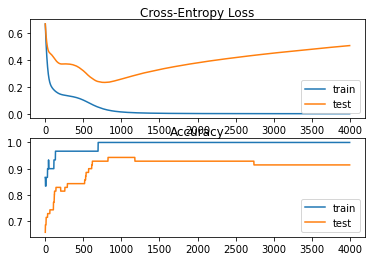

In [6]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can tie all of these pieces together; the complete example is listed below.

In [7]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/4000
1/1 [==============================] - 0s 268ms/step - loss: 0.6899 - accuracy: 0.5333 - val_loss: 0.6825 - val_accuracy: 0.5000
Epoch 2/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6741 - accuracy: 0.5667 - val_loss: 0.6723 - val_accuracy: 0.6714
Epoch 3/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.6587 - accuracy: 0.8333 - val_loss: 0.6625 - val_accuracy: 0.6714
Epoch 4/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6437 - accuracy: 0.8333 - val_loss: 0.6530 - val_accuracy: 0.6714
Epoch 5/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.6291 - accuracy: 0.8333 - val_loss: 0.6438 - val_accuracy: 0.6857
Epoch 6/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6149 - accuracy: 0.8333 - val_loss: 0.6350 - val_accuracy: 0.6857
Epoch 7/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.6010 - accuracy: 0.8667 - val_loss: 0.6266 - val_accuracy: 0.7000
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2403 - accuracy: 0.9000 - val_loss: 0.4557 - val_accuracy: 0.7286
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2380 - accuracy: 0.9000 - val_loss: 0.4549 - val_accuracy: 0.7286
Epoch 61/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.2357 - accuracy: 0.9000 - val_loss: 0.4541 - val_accuracy: 0.7286
Epoch 62/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.2336 - accuracy: 0.9000 - val_loss: 0.4533 - val_accuracy: 0.7286
Epoch 63/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.2315 - accuracy: 0.9000 - val_loss: 0.4525 - val_accuracy: 0.7286
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2295 - accuracy: 0.9000 - val_loss: 0.4517 - val_accuracy: 0.7429
Epoch 65/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.2276 - accuracy: 0.9000 - val_loss: 0.4509 - val_accuracy: 0.7429
Epoch 

1/1 [==============================] - 0s 23ms/step - loss: 0.1530 - accuracy: 0.9667 - val_loss: 0.3759 - val_accuracy: 0.8286
Epoch 174/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1527 - accuracy: 0.9667 - val_loss: 0.3755 - val_accuracy: 0.8286
Epoch 175/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.1524 - accuracy: 0.9667 - val_loss: 0.3752 - val_accuracy: 0.8286
Epoch 176/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.1521 - accuracy: 0.9667 - val_loss: 0.3749 - val_accuracy: 0.8286
Epoch 177/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1518 - accuracy: 0.9667 - val_loss: 0.3745 - val_accuracy: 0.8286
Epoch 178/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1515 - accuracy: 0.9667 - val_loss: 0.3742 - val_accuracy: 0.8286
Epoch 179/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1512 - accuracy: 0.9667 - val_loss: 0.3739 - val_accuracy: 0.8286
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1363 - accuracy: 0.9667 - val_loss: 0.3706 - val_accuracy: 0.8286
Epoch 288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1362 - accuracy: 0.9667 - val_loss: 0.3706 - val_accuracy: 0.8286
Epoch 289/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1362 - accuracy: 0.9667 - val_loss: 0.3706 - val_accuracy: 0.8286
Epoch 290/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1361 - accuracy: 0.9667 - val_loss: 0.3706 - val_accuracy: 0.8286
Epoch 291/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1360 - accuracy: 0.9667 - val_loss: 0.3707 - val_accuracy: 0.8286
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1359 - accuracy: 0.9667 - val_loss: 0.3707 - val_accuracy: 0.8286
Epoch 293/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1358 - accuracy: 0.9667 - val_loss: 0.3707 - val_accuracy: 0.8429
Epoch 294/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1253 - accuracy: 0.9667 - val_loss: 0.3638 - val_accuracy: 0.8429
Epoch 402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1252 - accuracy: 0.9667 - val_loss: 0.3636 - val_accuracy: 0.8429
Epoch 403/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1250 - accuracy: 0.9667 - val_loss: 0.3634 - val_accuracy: 0.8429
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1249 - accuracy: 0.9667 - val_loss: 0.3633 - val_accuracy: 0.8429
Epoch 405/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1248 - accuracy: 0.9667 - val_loss: 0.3631 - val_accuracy: 0.8429
Epoch 406/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1247 - accuracy: 0.9667 - val_loss: 0.3630 - val_accuracy: 0.8429
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1245 - accuracy: 0.9667 - val_loss: 0.3629 - val_accuracy: 0.8429
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1070 - accuracy: 0.9667 - val_loss: 0.3359 - val_accuracy: 0.8429
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1068 - accuracy: 0.9667 - val_loss: 0.3356 - val_accuracy: 0.8429
Epoch 517/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1066 - accuracy: 0.9667 - val_loss: 0.3353 - val_accuracy: 0.8429
Epoch 518/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1064 - accuracy: 0.9667 - val_loss: 0.3350 - val_accuracy: 0.8429
Epoch 519/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1062 - accuracy: 0.9667 - val_loss: 0.3346 - val_accuracy: 0.8429
Epoch 520/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1060 - accuracy: 0.9667 - val_loss: 0.3342 - val_accuracy: 0.8429
Epoch 521/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1058 - accuracy: 0.9667 - val_loss: 0.3338 - val_accuracy: 0.8429
Epoch 522/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0813 - accuracy: 0.9667 - val_loss: 0.2919 - val_accuracy: 0.8857
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0811 - accuracy: 0.9667 - val_loss: 0.2916 - val_accuracy: 0.8857
Epoch 631/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0808 - accuracy: 0.9667 - val_loss: 0.2913 - val_accuracy: 0.8857
Epoch 632/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0806 - accuracy: 0.9667 - val_loss: 0.2908 - val_accuracy: 0.8857
Epoch 633/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0803 - accuracy: 0.9667 - val_loss: 0.2904 - val_accuracy: 0.8857
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0801 - accuracy: 0.9667 - val_loss: 0.2901 - val_accuracy: 0.8857
Epoch 635/4000
1/1 [==============================] - 0s 89ms/step - loss: 0.0798 - accuracy: 0.9667 - val_loss: 0.2896 - val_accuracy: 0.8857
Epoch 636/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0545 - accuracy: 0.9667 - val_loss: 0.2501 - val_accuracy: 0.9286
Epoch 744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0543 - accuracy: 0.9667 - val_loss: 0.2498 - val_accuracy: 0.9286
Epoch 745/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0541 - accuracy: 0.9667 - val_loss: 0.2495 - val_accuracy: 0.9286
Epoch 746/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0539 - accuracy: 0.9667 - val_loss: 0.2492 - val_accuracy: 0.9286
Epoch 747/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0537 - accuracy: 0.9667 - val_loss: 0.2490 - val_accuracy: 0.9286
Epoch 748/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0535 - accuracy: 0.9667 - val_loss: 0.2488 - val_accuracy: 0.9286
Epoch 749/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0532 - accuracy: 0.9667 - val_loss: 0.2487 - val_accuracy: 0.9286
Epoch 750/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.2325 - val_accuracy: 0.9286
Epoch 858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 0.2324 - val_accuracy: 0.9286
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.2324 - val_accuracy: 0.9286
Epoch 860/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.2324 - val_accuracy: 0.9286
Epoch 861/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.2323 - val_accuracy: 0.9286
Epoch 862/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 0.2323 - val_accuracy: 0.9286
Epoch 863/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 0.2322 - val_accuracy: 0.9286
Epoch 864/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.2377 - val_accuracy: 0.9429
Epoch 972/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.2378 - val_accuracy: 0.9429
Epoch 973/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.2379 - val_accuracy: 0.9429
Epoch 974/4000
1/1 [==============================] - 0s 88ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.2381 - val_accuracy: 0.9429
Epoch 975/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.2382 - val_accuracy: 0.9429
Epoch 976/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.2383 - val_accuracy: 0.9429
Epoch 977/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.2384 - val_accuracy: 0.9429
Epoch 978/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.2530 - val_accuracy: 0.9429
Epoch 1086/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.2531 - val_accuracy: 0.9429
Epoch 1087/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.2533 - val_accuracy: 0.9429
Epoch 1088/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.2534 - val_accuracy: 0.9429
Epoch 1089/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.2536 - val_accuracy: 0.9429
Epoch 1090/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.2537 - val_accuracy: 0.9429
Epoch 1091/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.2538 - val_accuracy: 0.9429
Epoch 10

1/1 [==============================] - 0s 23ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.2622 - val_accuracy: 0.9429
Epoch 1143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.2624 - val_accuracy: 0.9429
Epoch 1144/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.2625 - val_accuracy: 0.9429
Epoch 1145/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.2627 - val_accuracy: 0.9429
Epoch 1146/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.2629 - val_accuracy: 0.9429
Epoch 1147/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.2631 - val_accuracy: 0.9429
Epoch 1148/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.2633 - val_accuracy: 0.9429
Epoch 11

1/1 [==============================] - 0s 23ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.2724 - val_accuracy: 0.9429
Epoch 1200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.2725 - val_accuracy: 0.9429
Epoch 1201/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.2727 - val_accuracy: 0.9429
Epoch 1202/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.2728 - val_accuracy: 0.9429
Epoch 1203/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.2730 - val_accuracy: 0.9429
Epoch 1204/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.2731 - val_accuracy: 0.9429
Epoch 1205/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.2733 - val_accuracy: 0.9429
Epoch 12

1/1 [==============================] - 0s 23ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.2810 - val_accuracy: 0.9429
Epoch 1257/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.2811 - val_accuracy: 0.9429
Epoch 1258/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.2813 - val_accuracy: 0.9429
Epoch 1259/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.2814 - val_accuracy: 0.9429
Epoch 1260/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.2816 - val_accuracy: 0.9429
Epoch 1261/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.2817 - val_accuracy: 0.9429
Epoch 1262/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.2818 - val_accuracy: 0.9429
Epoch 12

1/1 [==============================] - 0s 23ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2890 - val_accuracy: 0.9429
Epoch 1314/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2891 - val_accuracy: 0.9429
Epoch 1315/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2893 - val_accuracy: 0.9429
Epoch 1316/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2894 - val_accuracy: 0.9429
Epoch 1317/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2896 - val_accuracy: 0.9429
Epoch 1318/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2897 - val_accuracy: 0.9429
Epoch 1319/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2898 - val_accuracy: 0.9429
Epoch 13

1/1 [==============================] - 0s 23ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2965 - val_accuracy: 0.9429
Epoch 1371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2967 - val_accuracy: 0.9429
Epoch 1372/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2968 - val_accuracy: 0.9429
Epoch 1373/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2969 - val_accuracy: 0.9429
Epoch 1374/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2970 - val_accuracy: 0.9429
Epoch 1375/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2972 - val_accuracy: 0.9429
Epoch 1376/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2973 - val_accuracy: 0.9429
Epoch 13

1/1 [==============================] - 0s 23ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3037 - val_accuracy: 0.9286
Epoch 1428/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3038 - val_accuracy: 0.9286
Epoch 1429/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3040 - val_accuracy: 0.9286
Epoch 1430/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3041 - val_accuracy: 0.9286
Epoch 1431/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3042 - val_accuracy: 0.9286
Epoch 1432/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3043 - val_accuracy: 0.9286
Epoch 1433/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3044 - val_accuracy: 0.9286
Epoch 14

1/1 [==============================] - 0s 23ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3106 - val_accuracy: 0.9286
Epoch 1485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3107 - val_accuracy: 0.9286
Epoch 1486/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3108 - val_accuracy: 0.9286
Epoch 1487/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3109 - val_accuracy: 0.9286
Epoch 1488/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3111 - val_accuracy: 0.9286
Epoch 1489/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3112 - val_accuracy: 0.9286
Epoch 1490/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3113 - val_accuracy: 0.9286
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3169 - val_accuracy: 0.9286
Epoch 1542/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3171 - val_accuracy: 0.9286
Epoch 1543/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3172 - val_accuracy: 0.9286
Epoch 1544/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3173 - val_accuracy: 0.9286
Epoch 1545/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3175 - val_accuracy: 0.9286
Epoch 1546/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3176 - val_accuracy: 0.9286
Epoch 1547/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3177 - val_accuracy: 0.9286
Epoch 15

1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3234 - val_accuracy: 0.9286
Epoch 1599/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3235 - val_accuracy: 0.9286
Epoch 1600/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3237 - val_accuracy: 0.9286
Epoch 1601/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3238 - val_accuracy: 0.9286
Epoch 1602/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3239 - val_accuracy: 0.9286
Epoch 1603/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3240 - val_accuracy: 0.9286
Epoch 1604/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3241 - val_accuracy: 0.9286
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3298 - val_accuracy: 0.9286
Epoch 1656/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3299 - val_accuracy: 0.9286
Epoch 1657/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3300 - val_accuracy: 0.9286
Epoch 1658/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3301 - val_accuracy: 0.9286
Epoch 1659/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3302 - val_accuracy: 0.9286
Epoch 1660/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3303 - val_accuracy: 0.9286
Epoch 1661/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3304 - val_accuracy: 0.9286
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3358 - val_accuracy: 0.9286
Epoch 1713/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3359 - val_accuracy: 0.9286
Epoch 1714/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3360 - val_accuracy: 0.9286
Epoch 1715/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3361 - val_accuracy: 0.9286
Epoch 1716/4000
1/1 [==============================] - 0s 87ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3362 - val_accuracy: 0.9286
Epoch 1717/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3363 - val_accuracy: 0.9286
Epoch 1718/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3364 - val_accuracy: 0.9286
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3417 - val_accuracy: 0.9286
Epoch 1770/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3418 - val_accuracy: 0.9286
Epoch 1771/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3419 - val_accuracy: 0.9286
Epoch 1772/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3420 - val_accuracy: 0.9286
Epoch 1773/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3422 - val_accuracy: 0.9286
Epoch 1774/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3423 - val_accuracy: 0.9286
Epoch 1775/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3423 - val_accuracy: 0.9286
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3474 - val_accuracy: 0.9286
Epoch 1827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3475 - val_accuracy: 0.9286
Epoch 1828/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3476 - val_accuracy: 0.9286
Epoch 1829/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3477 - val_accuracy: 0.9286
Epoch 1830/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3478 - val_accuracy: 0.9286
Epoch 1831/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3479 - val_accuracy: 0.9286
Epoch 1832/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3480 - val_accuracy: 0.9286
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3528 - val_accuracy: 0.9286
Epoch 1884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3529 - val_accuracy: 0.9286
Epoch 1885/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3530 - val_accuracy: 0.9286
Epoch 1886/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3530 - val_accuracy: 0.9286
Epoch 1887/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3531 - val_accuracy: 0.9286
Epoch 1888/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3532 - val_accuracy: 0.9286
Epoch 1889/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3533 - val_accuracy: 0.9286
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3580 - val_accuracy: 0.9286
Epoch 1941/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3581 - val_accuracy: 0.9286
Epoch 1942/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3582 - val_accuracy: 0.9286
Epoch 1943/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3583 - val_accuracy: 0.9286
Epoch 1944/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3583 - val_accuracy: 0.9286
Epoch 1945/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3584 - val_accuracy: 0.9286
Epoch 1946/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3585 - val_accuracy: 0.9286
Epoch 19

1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3631 - val_accuracy: 0.9286
Epoch 1998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3632 - val_accuracy: 0.9286
Epoch 1999/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3632 - val_accuracy: 0.9286
Epoch 2000/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3633 - val_accuracy: 0.9286
Epoch 2001/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3634 - val_accuracy: 0.9286
Epoch 2002/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3635 - val_accuracy: 0.9286
Epoch 2003/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3636 - val_accuracy: 0.9286
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3681 - val_accuracy: 0.9286
Epoch 2055/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3681 - val_accuracy: 0.9286
Epoch 2056/4000
1/1 [==============================] - 0s 87ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3682 - val_accuracy: 0.9286
Epoch 2057/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3683 - val_accuracy: 0.9286
Epoch 2058/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3684 - val_accuracy: 0.9286
Epoch 2059/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3685 - val_accuracy: 0.9286
Epoch 2060/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3686 - val_accuracy: 0.9286
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3729 - val_accuracy: 0.9286
Epoch 2112/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3730 - val_accuracy: 0.9286
Epoch 2113/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3731 - val_accuracy: 0.9286
Epoch 2114/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3732 - val_accuracy: 0.9286
Epoch 2115/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3732 - val_accuracy: 0.9286
Epoch 2116/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3733 - val_accuracy: 0.9286
Epoch 2117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3734 - val_accuracy: 0.9286
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3776 - val_accuracy: 0.9286
Epoch 2169/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3777 - val_accuracy: 0.9286
Epoch 2170/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3778 - val_accuracy: 0.9286
Epoch 2171/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3779 - val_accuracy: 0.9286
Epoch 2172/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3780 - val_accuracy: 0.9286
Epoch 2173/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3781 - val_accuracy: 0.9286
Epoch 2174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3782 - val_accuracy: 0.9286
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3823 - val_accuracy: 0.9286
Epoch 2226/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3824 - val_accuracy: 0.9286
Epoch 2227/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3825 - val_accuracy: 0.9286
Epoch 2228/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3825 - val_accuracy: 0.9286
Epoch 2229/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3826 - val_accuracy: 0.9286
Epoch 2230/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3827 - val_accuracy: 0.9286
Epoch 2231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3828 - val_accuracy: 0.9286
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy: 0.9286
Epoch 2283/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy: 0.9286
Epoch 2284/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3870 - val_accuracy: 0.9286
Epoch 2285/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3871 - val_accuracy: 0.9286
Epoch 2286/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3872 - val_accuracy: 0.9286
Epoch 2287/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3872 - val_accuracy: 0.9286
Epoch 2288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3873 - val_accuracy: 0.9286
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3913 - val_accuracy: 0.9286
Epoch 2340/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3913 - val_accuracy: 0.9286
Epoch 2341/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3914 - val_accuracy: 0.9286
Epoch 2342/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3915 - val_accuracy: 0.9286
Epoch 2343/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3916 - val_accuracy: 0.9286
Epoch 2344/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3917 - val_accuracy: 0.9286
Epoch 2345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3917 - val_accuracy: 0.9286
Epoch 23

1/1 [==============================] - 0s 23ms/step - loss: 9.0225e-04 - accuracy: 1.0000 - val_loss: 0.3996 - val_accuracy: 0.9286
Epoch 2451/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.0119e-04 - accuracy: 1.0000 - val_loss: 0.3996 - val_accuracy: 0.9286
Epoch 2452/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.0006e-04 - accuracy: 1.0000 - val_loss: 0.3997 - val_accuracy: 0.9286
Epoch 2453/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.9895e-04 - accuracy: 1.0000 - val_loss: 0.3998 - val_accuracy: 0.9286
Epoch 2454/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.9786e-04 - accuracy: 1.0000 - val_loss: 0.3999 - val_accuracy: 0.9286
Epoch 2455/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.9677e-04 - accuracy: 1.0000 - val_loss: 0.3999 - val_accuracy: 0.9286
Epoch 2456/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.9564e-04 - accuracy: 1.0000 - val_loss: 0.4000 - v

1/1 [==============================] - 0s 23ms/step - loss: 7.9139e-04 - accuracy: 1.0000 - val_loss: 0.4075 - val_accuracy: 0.9286
Epoch 2561/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.9047e-04 - accuracy: 1.0000 - val_loss: 0.4075 - val_accuracy: 0.9286
Epoch 2562/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.8956e-04 - accuracy: 1.0000 - val_loss: 0.4076 - val_accuracy: 0.9286
Epoch 2563/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.8867e-04 - accuracy: 1.0000 - val_loss: 0.4077 - val_accuracy: 0.9286
Epoch 2564/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.8775e-04 - accuracy: 1.0000 - val_loss: 0.4078 - val_accuracy: 0.9286
Epoch 2565/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.8679e-04 - accuracy: 1.0000 - val_loss: 0.4078 - val_accuracy: 0.9286
Epoch 2566/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.8589e-04 - accuracy: 1.0000 - val_loss: 0.4079 - v

1/1 [==============================] - 0s 23ms/step - loss: 6.9834e-04 - accuracy: 1.0000 - val_loss: 0.4151 - val_accuracy: 0.9286
Epoch 2671/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.9759e-04 - accuracy: 1.0000 - val_loss: 0.4152 - val_accuracy: 0.9286
Epoch 2672/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.9685e-04 - accuracy: 1.0000 - val_loss: 0.4152 - val_accuracy: 0.9286
Epoch 2673/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.9605e-04 - accuracy: 1.0000 - val_loss: 0.4153 - val_accuracy: 0.9286
Epoch 2674/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.9522e-04 - accuracy: 1.0000 - val_loss: 0.4154 - val_accuracy: 0.9286
Epoch 2675/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.9444e-04 - accuracy: 1.0000 - val_loss: 0.4154 - val_accuracy: 0.9286
Epoch 2676/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.9371e-04 - accuracy: 1.0000 - val_loss: 0.4155 - v

1/1 [==============================] - 0s 23ms/step - loss: 6.1929e-04 - accuracy: 1.0000 - val_loss: 0.4224 - val_accuracy: 0.9143
Epoch 2781/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.1859e-04 - accuracy: 1.0000 - val_loss: 0.4225 - val_accuracy: 0.9143
Epoch 2782/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.1793e-04 - accuracy: 1.0000 - val_loss: 0.4226 - val_accuracy: 0.9143
Epoch 2783/4000
1/1 [==============================] - 0s 24ms/step - loss: 6.1724e-04 - accuracy: 1.0000 - val_loss: 0.4226 - val_accuracy: 0.9143
Epoch 2784/4000
1/1 [==============================] - 0s 24ms/step - loss: 6.1665e-04 - accuracy: 1.0000 - val_loss: 0.4227 - val_accuracy: 0.9143
Epoch 2785/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.1601e-04 - accuracy: 1.0000 - val_loss: 0.4227 - val_accuracy: 0.9143
Epoch 2786/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.1535e-04 - accuracy: 1.0000 - val_loss: 0.4228 - v

1/1 [==============================] - 0s 22ms/step - loss: 5.5155e-04 - accuracy: 1.0000 - val_loss: 0.4295 - val_accuracy: 0.9143
Epoch 2891/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.5096e-04 - accuracy: 1.0000 - val_loss: 0.4296 - val_accuracy: 0.9143
Epoch 2892/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.5039e-04 - accuracy: 1.0000 - val_loss: 0.4296 - val_accuracy: 0.9143
Epoch 2893/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.4981e-04 - accuracy: 1.0000 - val_loss: 0.4297 - val_accuracy: 0.9143
Epoch 2894/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.4926e-04 - accuracy: 1.0000 - val_loss: 0.4297 - val_accuracy: 0.9143
Epoch 2895/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.4870e-04 - accuracy: 1.0000 - val_loss: 0.4298 - val_accuracy: 0.9143
Epoch 2896/4000
1/1 [==============================] - 0s 87ms/step - loss: 5.4812e-04 - accuracy: 1.0000 - val_loss: 0.4299 - v

1/1 [==============================] - 0s 22ms/step - loss: 4.9320e-04 - accuracy: 1.0000 - val_loss: 0.4363 - val_accuracy: 0.9143
Epoch 3001/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.9269e-04 - accuracy: 1.0000 - val_loss: 0.4364 - val_accuracy: 0.9143
Epoch 3002/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.9219e-04 - accuracy: 1.0000 - val_loss: 0.4365 - val_accuracy: 0.9143
Epoch 3003/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.9172e-04 - accuracy: 1.0000 - val_loss: 0.4365 - val_accuracy: 0.9143
Epoch 3004/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.9121e-04 - accuracy: 1.0000 - val_loss: 0.4366 - val_accuracy: 0.9143
Epoch 3005/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.9072e-04 - accuracy: 1.0000 - val_loss: 0.4366 - val_accuracy: 0.9143
Epoch 3006/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.9024e-04 - accuracy: 1.0000 - val_loss: 0.4367 - v

1/1 [==============================] - 0s 22ms/step - loss: 4.4258e-04 - accuracy: 1.0000 - val_loss: 0.4429 - val_accuracy: 0.9143
Epoch 3111/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.4214e-04 - accuracy: 1.0000 - val_loss: 0.4430 - val_accuracy: 0.9143
Epoch 3112/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.4173e-04 - accuracy: 1.0000 - val_loss: 0.4431 - val_accuracy: 0.9143
Epoch 3113/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.4131e-04 - accuracy: 1.0000 - val_loss: 0.4431 - val_accuracy: 0.9143
Epoch 3114/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.4088e-04 - accuracy: 1.0000 - val_loss: 0.4432 - val_accuracy: 0.9143
Epoch 3115/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.4042e-04 - accuracy: 1.0000 - val_loss: 0.4433 - val_accuracy: 0.9143
Epoch 3116/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.4001e-04 - accuracy: 1.0000 - val_loss: 0.4433 - v

1/1 [==============================] - 0s 22ms/step - loss: 3.9839e-04 - accuracy: 1.0000 - val_loss: 0.4494 - val_accuracy: 0.9143
Epoch 3221/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.9802e-04 - accuracy: 1.0000 - val_loss: 0.4495 - val_accuracy: 0.9143
Epoch 3222/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.9765e-04 - accuracy: 1.0000 - val_loss: 0.4496 - val_accuracy: 0.9143
Epoch 3223/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.9727e-04 - accuracy: 1.0000 - val_loss: 0.4496 - val_accuracy: 0.9143
Epoch 3224/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.9689e-04 - accuracy: 1.0000 - val_loss: 0.4497 - val_accuracy: 0.9143
Epoch 3225/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.9653e-04 - accuracy: 1.0000 - val_loss: 0.4497 - val_accuracy: 0.9143
Epoch 3226/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.9616e-04 - accuracy: 1.0000 - val_loss: 0.4498 - v

1/1 [==============================] - 0s 23ms/step - loss: 3.5970e-04 - accuracy: 1.0000 - val_loss: 0.4557 - val_accuracy: 0.9143
Epoch 3331/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.5938e-04 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 0.9143
Epoch 3332/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5905e-04 - accuracy: 1.0000 - val_loss: 0.4559 - val_accuracy: 0.9143
Epoch 3333/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5871e-04 - accuracy: 1.0000 - val_loss: 0.4559 - val_accuracy: 0.9143
Epoch 3334/4000
1/1 [==============================] - 0s 90ms/step - loss: 3.5838e-04 - accuracy: 1.0000 - val_loss: 0.4560 - val_accuracy: 0.9143
Epoch 3335/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5805e-04 - accuracy: 1.0000 - val_loss: 0.4560 - val_accuracy: 0.9143
Epoch 3336/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5772e-04 - accuracy: 1.0000 - val_loss: 0.4561 - v

1/1 [==============================] - 0s 23ms/step - loss: 3.2557e-04 - accuracy: 1.0000 - val_loss: 0.4619 - val_accuracy: 0.9143
Epoch 3441/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2529e-04 - accuracy: 1.0000 - val_loss: 0.4620 - val_accuracy: 0.9143
Epoch 3442/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.2500e-04 - accuracy: 1.0000 - val_loss: 0.4620 - val_accuracy: 0.9143
Epoch 3443/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2470e-04 - accuracy: 1.0000 - val_loss: 0.4621 - val_accuracy: 0.9143
Epoch 3444/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2442e-04 - accuracy: 1.0000 - val_loss: 0.4621 - val_accuracy: 0.9143
Epoch 3445/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2412e-04 - accuracy: 1.0000 - val_loss: 0.4622 - val_accuracy: 0.9143
Epoch 3446/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.2384e-04 - accuracy: 1.0000 - val_loss: 0.4623 - v

1/1 [==============================] - 0s 23ms/step - loss: 2.9544e-04 - accuracy: 1.0000 - val_loss: 0.4679 - val_accuracy: 0.9143
Epoch 3551/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.9519e-04 - accuracy: 1.0000 - val_loss: 0.4680 - val_accuracy: 0.9143
Epoch 3552/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.9493e-04 - accuracy: 1.0000 - val_loss: 0.4680 - val_accuracy: 0.9143
Epoch 3553/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.9468e-04 - accuracy: 1.0000 - val_loss: 0.4681 - val_accuracy: 0.9143
Epoch 3554/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.9442e-04 - accuracy: 1.0000 - val_loss: 0.4682 - val_accuracy: 0.9143
Epoch 3555/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.9415e-04 - accuracy: 1.0000 - val_loss: 0.4682 - val_accuracy: 0.9143
Epoch 3556/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.9389e-04 - accuracy: 1.0000 - val_loss: 0.4683 - v

1/1 [==============================] - 0s 23ms/step - loss: 2.6869e-04 - accuracy: 1.0000 - val_loss: 0.4738 - val_accuracy: 0.9143
Epoch 3661/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.6846e-04 - accuracy: 1.0000 - val_loss: 0.4739 - val_accuracy: 0.9143
Epoch 3662/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.6823e-04 - accuracy: 1.0000 - val_loss: 0.4740 - val_accuracy: 0.9143
Epoch 3663/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.6800e-04 - accuracy: 1.0000 - val_loss: 0.4740 - val_accuracy: 0.9143
Epoch 3664/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.6777e-04 - accuracy: 1.0000 - val_loss: 0.4741 - val_accuracy: 0.9143
Epoch 3665/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.6754e-04 - accuracy: 1.0000 - val_loss: 0.4741 - val_accuracy: 0.9143
Epoch 3666/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.6731e-04 - accuracy: 1.0000 - val_loss: 0.4742 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.4487e-04 - accuracy: 1.0000 - val_loss: 0.4796 - val_accuracy: 0.9143
Epoch 3771/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4466e-04 - accuracy: 1.0000 - val_loss: 0.4797 - val_accuracy: 0.9143
Epoch 3772/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4446e-04 - accuracy: 1.0000 - val_loss: 0.4797 - val_accuracy: 0.9143
Epoch 3773/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4426e-04 - accuracy: 1.0000 - val_loss: 0.4798 - val_accuracy: 0.9143
Epoch 3774/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4406e-04 - accuracy: 1.0000 - val_loss: 0.4798 - val_accuracy: 0.9143
Epoch 3775/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4386e-04 - accuracy: 1.0000 - val_loss: 0.4799 - val_accuracy: 0.9143
Epoch 3776/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4364e-04 - accuracy: 1.0000 - val_loss: 0.4799 - v

1/1 [==============================] - 0s 87ms/step - loss: 2.2359e-04 - accuracy: 1.0000 - val_loss: 0.4853 - val_accuracy: 0.9143
Epoch 3881/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2341e-04 - accuracy: 1.0000 - val_loss: 0.4853 - val_accuracy: 0.9143
Epoch 3882/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.2323e-04 - accuracy: 1.0000 - val_loss: 0.4854 - val_accuracy: 0.9143
Epoch 3883/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.2304e-04 - accuracy: 1.0000 - val_loss: 0.4854 - val_accuracy: 0.9143
Epoch 3884/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2286e-04 - accuracy: 1.0000 - val_loss: 0.4855 - val_accuracy: 0.9143
Epoch 3885/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2268e-04 - accuracy: 1.0000 - val_loss: 0.4855 - val_accuracy: 0.9143
Epoch 3886/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2250e-04 - accuracy: 1.0000 - val_loss: 0.4856 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.0452e-04 - accuracy: 1.0000 - val_loss: 0.4909 - val_accuracy: 0.9143
Epoch 3991/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0435e-04 - accuracy: 1.0000 - val_loss: 0.4909 - val_accuracy: 0.9143
Epoch 3992/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.0418e-04 - accuracy: 1.0000 - val_loss: 0.4910 - val_accuracy: 0.9143
Epoch 3993/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0402e-04 - accuracy: 1.0000 - val_loss: 0.4910 - val_accuracy: 0.9143
Epoch 3994/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.0386e-04 - accuracy: 1.0000 - val_loss: 0.4911 - val_accuracy: 0.9143
Epoch 3995/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0369e-04 - accuracy: 1.0000 - val_loss: 0.4911 - val_accuracy: 0.9143
Epoch 3996/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.0353e-04 - accuracy: 1.0000 - val_loss: 0.4912 - v

Running the example first reports the model performance on the train and test datasets. We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

Line plots are also created showing learning curves of cross-entropy loss and classification accuracy on the train and test sets for each training epoch. The learning curve for loss shows a clear pattern of overfitting, mirrored in the learning curve for the classification accuracy.

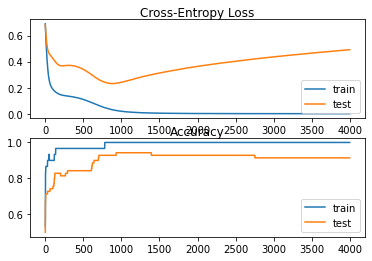

In [8]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### MLP Model With Weight Regularization

We can add weight regularization to the hidden layer to reduce the overfitting of the model to the training dataset and improve the performance on the holdout set. We will use the L2 vector norm, also called weight decay, chosen arbitrarily with a regularization parameter (called alpha or lambda) of 0.001. This can be done by adding the `kernel_regularizer` argument to the layer and setting it to an instance of `l2`.

```
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
```

The updated example of fitting and evaluating the model on the moons dataset with weight regularization is listed below.

In [10]:
# mlp with weight regularization for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.943


Running the example first reports the performance of the model on the train and test datasets.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we see no change in the accuracy on the training dataset and an improvement on the test dataset.

We would expect that the telltale learning curve for overfitting would also have been changed through weight regularization. Instead of the model's accuracy on the test set increasing and then decreasing again, we should see it continually rise during training. As expected, we see the learning curves for loss and accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset.

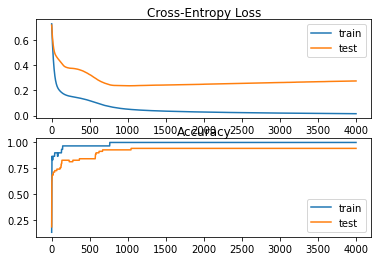

In [11]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### Grid Search Regularization Hyperparameter

Once you can confirm that weight regularization may improve your overfit model, you can test different regularization parameter values. It is a good practice to first grid search through some orders of magnitude between 0.0 and 0.1, once a level is found, it is a grid search on that level. We can grid search through the orders of magnitude by defining the values to test, looping through each, and recording the train and test performance.

```
...
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
...
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
...
all_train.append(train_acc)
all_test.append(test_acc)
```

Once we have all of the values, we can graph the results as a line plot to help spot any patterns in the configurations to the train and test accuracies. Because parameters jump orders of magnitude (powers of 10), we can use a logarithmic scale to create a line plot of the results. The Matplotlib library allows this via the `semilogx()` function. For example:

```
pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
```

The complete example for grid searching weight regularization values on the moon dataset is listed below.

In [12]:
# mlp with weight regularization for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
    # define model
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    model.fit(trainX, trainy, epochs=4000, verbose=0)

    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)

    print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
    all_train.append(train_acc)
    all_test.append(test_acc)

Param: 0.100000, Train: 0.967, Test: 0.829
Param: 0.010000, Train: 1.000, Test: 0.929
Param: 0.001000, Train: 1.000, Test: 0.943
Param: 0.000100, Train: 1.000, Test: 0.929
Param: 0.000010, Train: 1.000, Test: 0.914
Param: 0.000001, Train: 1.000, Test: 0.914


Running the example prints the parameter value and the accuracy on the train and test sets for each evaluated model.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, the results suggest that 0.01 or 0.001 may be sufficient and may provide good bounds for further grid searching.

A line plot of the results is also created, showing the increase in test accuracy with larger weight regularization parameter values, at least to a point. We can see that using the largest value of 0.1 results in a large drop in both train and test accuracy.

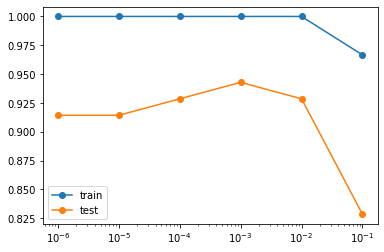

In [13]:
# plot train and test means
pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()

## Extensions

* **Try Alternates**. Update the example to use L1 or the combined L1L2 methods instead of L2 regularization.
* **Report Weight Norm**. Update the example to calculate the magnitude of the network weights and demonstrate that regularization made the magnitude smaller.
* **Regularize Output Layer**. Update the example to regularize the output layer of the model and compare the results.
* **Regularize Bias**. Update the example to regularize the bias weight and compare the results.
* **Repeated Model Evaluation**. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.
* **Grid Search Along Order of Magnitude**. Update the grid search example to grid search within the best-performing order of magnitude of parameter values.
* **Repeated Regularization of Model**. Create a new example to continue the training of a fit model with increasing levels of regularization (e.g., 1E-6, 1E-5, etc.) and see if it results in a better performing model on the test set.

## Summary

In this tutorial, you discovered weight regularization as an approach to reduce overfitting for neural networks. Specifically, you learned:

* Large weights in a neural network signify a more complex network that has overfit the training data.
* Penalizing a network based on the size of the network weights during training can reduce overfitting.
* An L1 or L2 vector norm penalty can be added to the optimization of the network to encourage smaller weights.